In [35]:
# Importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
PATH = "/content/drive/MyDrive/Colab Notebooks/K-DAI/ปี 1 เทอม 2/05177001 Linear Algebra for Data Science/PJ_Mid/Real estate valuation data set.xlsx"
df = pd.read_excel (PATH, usecols=[1,2,3,4,5,6,7])
print (df)

     X1 transaction date  ...  Y house price of unit area
0            2012.916667  ...                        37.9
1            2012.916667  ...                        42.2
2            2013.583333  ...                        47.3
3            2013.500000  ...                        54.8
4            2012.833333  ...                        43.1
..                   ...  ...                         ...
409          2013.000000  ...                        15.4
410          2012.666667  ...                        50.0
411          2013.250000  ...                        40.6
412          2013.000000  ...                        52.5
413          2013.500000  ...                        63.9

[414 rows x 7 columns]


In [8]:
df.shape

(414, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [10]:
df.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [11]:
#mean = np.mean(x) # หาค่า mean เพื่อแทนที่ null
#print(mean)

#x= x.fillna(mean) # ใส่ค่า mean ใน null
#print(x)

Run model ที่ 1 กำจัด MultiCollinearity

In [12]:
 #g = sns.pairplot(df)
 #g.fig.set_size_inches(9,9)

In [13]:
#plt.figure(figsize=(15,15))
#sns.heatmap(data=df.corr(), annot=True, fmt=".2f")

In [14]:
thershold = 0.7
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > thershold)]
print(f"MultiCollinearity {thershold}: {to_drop}")

MultiCollinearity 0.7: ['X6 longitude']


In [15]:
df_filcol = df.drop(columns=to_drop)

In [16]:
df_filcol

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,37.9
1,2012.916667,19.5,306.59470,9,24.98034,42.2
2,2013.583333,13.3,561.98450,5,24.98746,47.3
3,2013.500000,13.3,561.98450,5,24.98746,54.8
4,2012.833333,5.0,390.56840,5,24.97937,43.1
...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,15.4
410,2012.666667,5.6,90.45606,9,24.97433,50.0
411,2013.250000,18.8,390.96960,7,24.97923,40.6
412,2013.000000,8.1,104.81010,5,24.96674,52.5


In [17]:
from sklearn.model_selection import train_test_split
x = df_filcol.drop(columns=["Y house price of unit area"])
y = df_filcol["Y house price of unit area"]

In [18]:
print(x.shape, y.shape)

(414, 5) (414,)


In [19]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3, random_state=100)

In [20]:
print(x_train1.shape, x_test1.shape, y_train1.shape, y_test1.shape)

(289, 5) (125, 5) (289,) (125,)


In [21]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [22]:
%%time
m1 = LR.fit(x_train1, y_train1)

CPU times: user 4.86 ms, sys: 2.03 ms, total: 6.88 ms
Wall time: 22.2 ms


In [23]:
print(m1.coef_)
print(m1.intercept_)

[ 6.35284724e+00 -2.85260766e-01 -4.57794752e-03  1.06128656e+00
  1.98483671e+02]
-17701.132159901288


In [24]:
list(zip(df.columns, m1.coef_))

[('X1 transaction date', 6.3528472365174915),
 ('X2 house age', -0.28526076572833187),
 ('X3 distance to the nearest MRT station', -0.004577947516969272),
 ('X4 number of convenience stores', 1.061286562197566),
 ('X5 latitude', 198.48367136385406)]

In [25]:
print(x_train1.shape)

(289, 5)


In [26]:
%%time
y_train_pred1 = m1.predict(x_train1)

CPU times: user 3.39 ms, sys: 1.11 ms, total: 4.49 ms
Wall time: 6.22 ms


In [27]:
from sklearn.metrics import *
from math import sqrt

In [28]:
mse = mean_squared_error(y_train1, y_train_pred1)
rmse = sqrt(mse)
print(mse)
print(rmse)

90.21209930636081
9.498005017179176


In [29]:
print(x_train1.shape, y_train1.shape)

(289, 5) (289,)


In [30]:
import statsmodels.api as sm
x_train1 = sm.add_constant(x_train1)
m1 = sm.OLS(y_train1, x_train1).fit()
print(m1.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.557
Model:                                    OLS   Adj. R-squared:                  0.549
Method:                         Least Squares   F-statistic:                     71.13
Date:                        Thu, 25 Nov 2021   Prob (F-statistic):           5.17e-48
Time:                                04:45:54   Log-Likelihood:                -1060.6
No. Observations:                         289   AIC:                             2133.
Df Residuals:                             283   BIC:                             2155.
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [31]:
print(x_test1.shape,y_test1.shape)

(125, 5) (125,)


In [32]:
%%time
y_test_pred1 = LR.predict(x_test1)

CPU times: user 3.72 ms, sys: 0 ns, total: 3.72 ms
Wall time: 3.93 ms


In [36]:
mse = mean_squared_error(y_test1, y_test_pred1)
rmse = sqrt(mse)
print(mse)
print(rmse)

48.314941969027885
6.950895048051573


Run Model ที่ 2

กำจัด Outlier และ Normalization

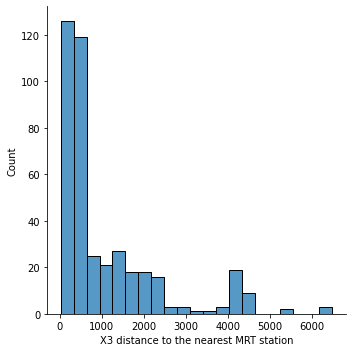

In [37]:
sns.displot(df_filcol["X3 distance to the nearest MRT station"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


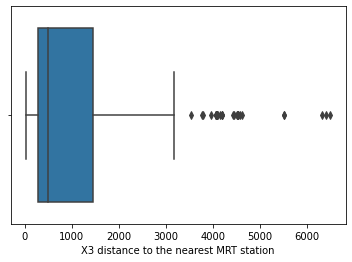

In [38]:
sns.boxplot(df_filcol["X3 distance to the nearest MRT station"])

In [39]:
q3_label_x3 = df_filcol["X3 distance to the nearest MRT station"].quantile(.75)
q1_label_x3 = df_filcol["X3 distance to the nearest MRT station"].quantile(.25)
IQR_x3 = q3_label_x3 - q1_label_x3
thershold_outlier_max_x3 = q3_label_x3 + 3*IQR_x3
thershold_outlier_min_x3 = q1_label_x3 - 3*IQR_x3

print(thershold_outlier_min_x3, thershold_outlier_max_x3)

-3205.5378000000005 4949.141600000001


In [40]:
df_train_cutout_x3 = df_filcol[df_filcol["X3 distance to the nearest MRT station"] <= thershold_outlier_max_x3] 

In [41]:
type(df_train_cutout_x3)

pandas.core.frame.DataFrame

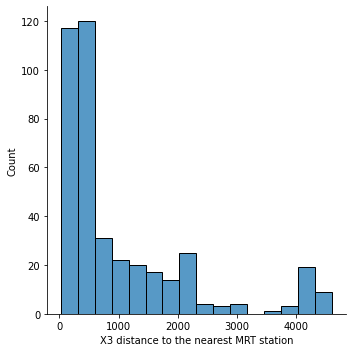

In [42]:
sns.displot(df_train_cutout_x3["X3 distance to the nearest MRT station"])

In [43]:
df_train_cutout_x3

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,37.9
1,2012.916667,19.5,306.59470,9,24.98034,42.2
2,2013.583333,13.3,561.98450,5,24.98746,47.3
3,2013.500000,13.3,561.98450,5,24.98746,54.8
4,2012.833333,5.0,390.56840,5,24.97937,43.1
...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,15.4
410,2012.666667,5.6,90.45606,9,24.97433,50.0
411,2013.250000,18.8,390.96960,7,24.97923,40.6
412,2013.000000,8.1,104.81010,5,24.96674,52.5


In [44]:
from sklearn.model_selection import train_test_split
x2 = df_train_cutout_x3.drop(columns=["Y house price of unit area"])
y2 = df_train_cutout_x3["Y house price of unit area"]

In [45]:
from sklearn.preprocessing import StandardScaler 
scale = StandardScaler()
df_train_cutout_x3 = scale.fit_transform(x2)
df_train_cutout_x3_norm = pd.DataFrame(df_train_cutout_x3, columns = ['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude'])
print(df_train_cutout_x3_norm)

     X1 transaction date  ...  X5 latitude
0              -0.821000  ...     1.115965
1              -0.821000  ...     0.901582
2               1.549973  ...     1.479768
3               1.253601  ...     1.479768
4              -1.117372  ...     0.822812
..                   ...  ...          ...
404            -0.524629  ...    -2.248400
405            -1.710115  ...     0.413533
406             0.364486  ...     0.811443
407            -0.524629  ...    -0.202821
408             1.253601  ...     0.413533

[409 rows x 5 columns]


In [46]:
x2 = df_train_cutout_x3_norm

In [47]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3, random_state=100)

In [48]:
print(x_train2.shape, x_test2.shape, y_train2.shape, y_test2.shape)

(286, 5) (123, 5) (286,) (123,)


In [49]:
from sklearn.linear_model import LinearRegression
LR2 = LinearRegression()
m2 = LR2.fit(x_train2, y_train2)

In [50]:
print(m2.coef_)
print(m2.intercept_)

[ 0.82438106 -3.38654265 -5.39867585  2.80064529  2.58446298]
37.75312089641848


In [51]:
list(zip(df.columns, m2.coef_))

[('X1 transaction date', 0.8243810555791887),
 ('X2 house age', -3.3865426491236237),
 ('X3 distance to the nearest MRT station', -5.398675849468063),
 ('X4 number of convenience stores', 2.800645290290646),
 ('X5 latitude', 2.5844629819448235)]

In [52]:
y_train_pred2 = m2.predict(x_train2)

In [53]:
from sklearn.metrics import *
from math import sqrt

In [54]:
mse2 = mean_squared_error(y_train2, y_train_pred2)
rmse2 = sqrt(mse2)
print(mse2)
print(rmse2)

57.51755985729024
7.584033218366744


In [55]:
print(x_train2.shape,y_train2.shape)

(286, 5) (286,)


In [57]:
import statsmodels.api as sm
x_train2 = sm.add_constant(x_train2)
m2 = sm.OLS(y_train2, x_train2).fit()
print(m2.summary())

ValueError: ignored

In [ ]:
y_test_pred2 = m2.predict(x_test2)
mse = mean_squared_error(y_test2, y_test_pred2)
rmse = sqrt(mse)
print(mse)
print(rmse)